# Challenge:

1) Import and explore the dataset. Recall the load_breast_cancer() method will return an object that contains the data in .data, the labels in .target, and the column names in .feature_names attributes.

2) Build a Correlation Heatmap using Seaborn to check for each feature's correlation with the labels.

3) Build a second Correlation Heatmap using Seaborn to check for mutlicollinearity between features.

4) Scale and transform the data using a StandardScaler() object and any appropriate methods it contains.

5) Split the newly scaled data into training and testing sets using train_test_split().

6) Create an SVC() object, which can be found in sklearn.svm

7) Fit the model to the scaled data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


lbc = load_breast_cancer()
df = pd.DataFrame(lbc.data)
df.columns = lbc.feature_names
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


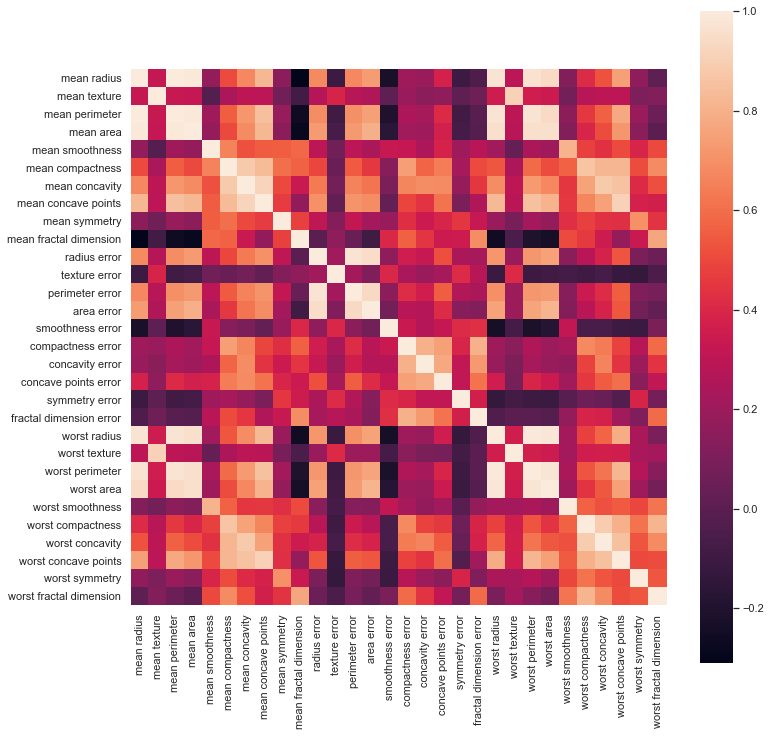

In [2]:
# Make it bigger
sns.set(rc={'figure.figsize':(12,12)})

correlation = df.corr()
sns.heatmap(correlation, square=True)

In [3]:
# Multicollinearity is when "independant" variables correlate with eachother. 
# This can be a problem because we should be able to change independant variables on their own.
# One common way to check for this is using VIF (Variance Inflation Factors).

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Start with all variables
df_copy = df.copy()

# Tbh I don't know why we need this
df_copy['Intercept'] = 1

# Get VIF
vif = pd.DataFrame()
vif["Variable"] = df_copy.columns
vif["VIF"] = [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])]

vif

# Refs: 
# https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/
# https://etav.github.io/python/vif_factor_python.html
# https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

,Variable,VIF
0,mean radius,3806.115296
1,mean texture,11.884048
2,mean perimeter,3786.400419
3,mean area,347.878657
4,mean smoothness,8.194282
5,mean compactness,50.505168
6,mean concavity,70.767720
7,mean concave points,60.041733
8,mean symmetry,4.220656
9,mean fractal dimension,15.756977


In [4]:
# Some of these variables, such as mean concavity and worst concavity, are by default going to be correlated.
# We can see that they have incredibly high VIFs (high is >10). 
# The only variables from that list that have acceptable VIF are <5. 
# To avoid this structural multicollinearity, let's separate all the mean values from the error and worst values.

df_copy = df[['mean radius', 'mean texture', 'mean area', 'mean smoothness',
              'mean compactness', 'mean concavity', 'mean concave points',
              'mean symmetry', 'mean fractal dimension']].copy()
df_copy['Intercept'] = 1

vif = pd.DataFrame()
vif["Variable"] = df_copy.columns
vif["VIF"] = [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])]

vif

,Variable,VIF
0,mean radius,62.730399
1,mean texture,1.186706
2,mean area,50.145150
3,mean smoothness,2.904024
4,mean compactness,11.890585
5,mean concavity,11.400681
6,mean concave points,21.620461
7,mean symmetry,1.769178
8,mean fractal dimension,6.192637
9,Intercept,1283.334622


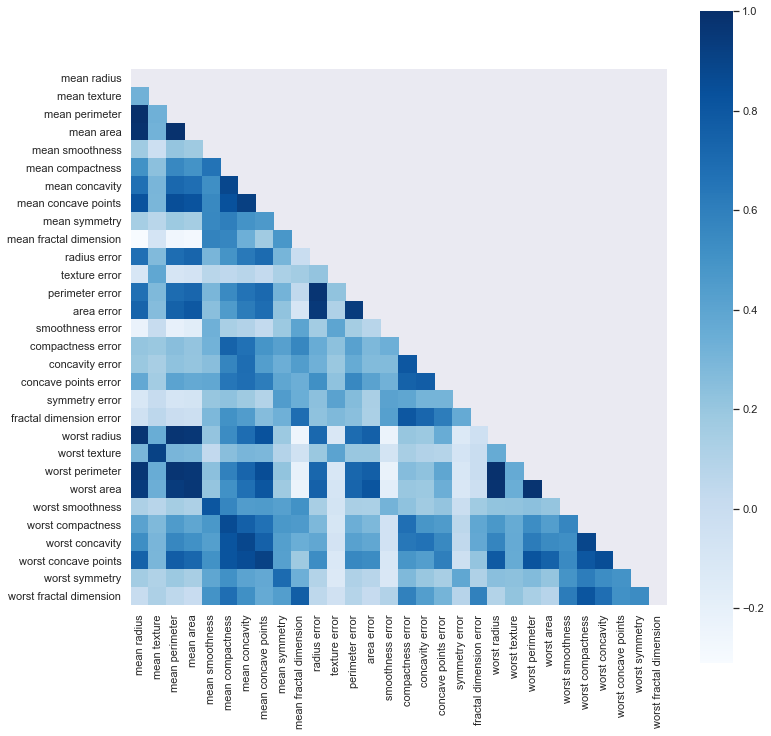

In [5]:
# Okay, that's more reasonable. 
# Some multicollinearity (such as between mean radius and area) is going to be unavoidable here.
# Let's toss out a heatmap to meet that requirement. 

# Mask
mask = np.triu(correlation.corr())
# Pretty colors
cmap = 'Blues'
# Show the heatmap
sns.heatmap(correlation, mask=mask, cmap=cmap, square=True)

In [6]:
# StandardScaler()
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
df_scaled = scalar.fit_transform(df)

In [7]:
# train_test_split()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scaled, lbc.target, random_state=0)

In [8]:
# SVC() object
from sklearn import svm

df_svm = svm.SVC(kernel='linear')
df_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
from sklearn import metrics

y_pred = df_svm.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

[[51  2]
 [ 2 88]]


In [10]:
total = confusion[0, 0] + confusion[0, 1] + confusion[1, 0] + confusion[1, 1]

accuracy = (confusion[1, 1] + confusion[0, 0]) / total
misaccuracy = (confusion[0][1] + confusion[1][0]) / total
precision = confusion[1][1] / (confusion[0][1] + confusion[1][1])
recall = confusion[1][1] / (confusion[1][0] + confusion[1][1])

f1_score = (2*precision)*recall/ (precision + recall)

print("Accuracy: {}\nMisaccuracy,: {}\nPrecision,: {}\nRecall,: {}\nf1_score: {}"
      .format(accuracy, misaccuracy, precision, recall, f1_score))

Accuracy: 0.972027972027972
Misaccuracy,: 0.027972027972027972
Precision,: 0.9777777777777777
Recall,: 0.9777777777777777
f1_score: 0.9777777777777777


In [11]:
# Looks good enough to me ¯\_(ツ)_/¯